## Linear Regression(supervised learning)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set()
%precision 3

'%.3f'

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

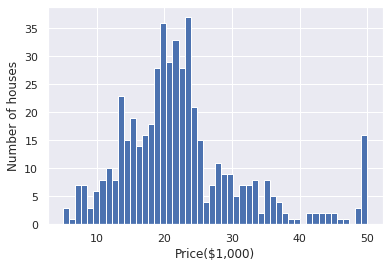

In [5]:
plt.hist(boston.target, bins=50)
plt.xlabel('Price($1,000)')
plt.ylabel("Number of houses")

Text(0, 0.5, 'Prices of houes')

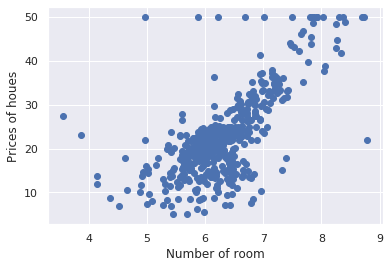

In [6]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel("Number of room")
plt.ylabel("Prices of houes")

In [7]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df["Price"] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


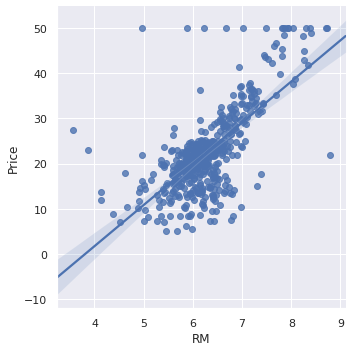

In [11]:
sns.lmplot("RM", "Price", data=boston_df)

In [12]:
X = boston_df.RM
print(X.shape)
X = np.vstack(boston_df.RM)
print(X.shape)

(506,)
(506, 1)


In [13]:
Y = boston_df.Price
print(Y.shape)

(506,)


In [14]:
X = np.array( [[value, 1] for value in X])

In [15]:
print(type(X))
X

<class 'numpy.ndarray'>


array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [16]:
X = X.astype(np.float64)

In [17]:
print(type(X))
X

<class 'numpy.ndarray'>


array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [18]:
a, b = np.linalg.lstsq(X, Y)[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [19]:
print(a)
print(b)

9.102108981180313
-34.670620776438575


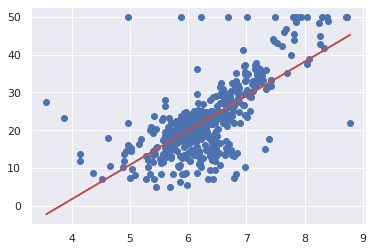

In [20]:
plt.plot(boston_df.RM, boston_df.Price, 'o')
x = boston_df.RM
plt.plot(x, a*x + b, 'r')

In [22]:
result = np.linalg.lstsq(X, Y)
result

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([  9.102, -34.671]), array([22061.879]), 2, array([143.995,   2.467]))

In [26]:
error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print(rmse[0])

6.6030713892225625


In [27]:
import sklearn
from sklearn.linear_model import LinearRegression

In [29]:
lreg = LinearRegression()

In [30]:
X_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

In [31]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(lreg.intercept_)#切片

36.45948838509015


In [36]:
print(len(lreg.coef_))#係数

13


In [37]:
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ["Features"]

coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_
                                            
                                            )
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, boston_df.Price)

In [52]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [53]:
lreg = LinearRegression()

In [54]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Text(0.5, 1.0, 'Residual Plots')

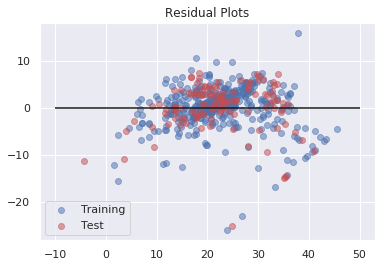

In [56]:
train = plt.scatter(pred_train, (pred_train-Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha=0.5)


plt.hlines(y=0, xmin=-10, xmax=50)
plt.legend((train, test), ('Training', 'Test'), loc='lower left')
plt.title("Residual Plots")